In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('/Users/xiaoquanliu/Desktop/Book_DataCode/第六章/HSI_1.csv')

# 将日期列转换为datetime对象，并设置为索引
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  
df.set_index('Date', inplace=True)

# 提取恒生指数序列
HS_index = df['HSI']


In [3]:
# 创建并拟合ARIMA模型
model = ARIMA(HS_index, order=(2,0,2))
model_fit = model.fit()

# 输出ARIMA模型的参数
print(model_fit.summary())




                               SARIMAX Results                                
Dep. Variable:                    HSI   No. Observations:                  248
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1819.772
Date:                Sun, 15 Sep 2024   AIC                           3651.543
Time:                        22:04:45   BIC                           3672.624
Sample:                             0   HQIC                          3660.030
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.2190     26.720     -1.355      0.175     -88.590      16.152
ar.L1         -0.0263      0.171     -0.154      0.878      -0.360       0.308
ar.L2         -0.8379      0.149     -5.605      0.0

/Users/xiaoquanliu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xiaoquanliu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xiaoquanliu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0, 0.5, 'HSI')

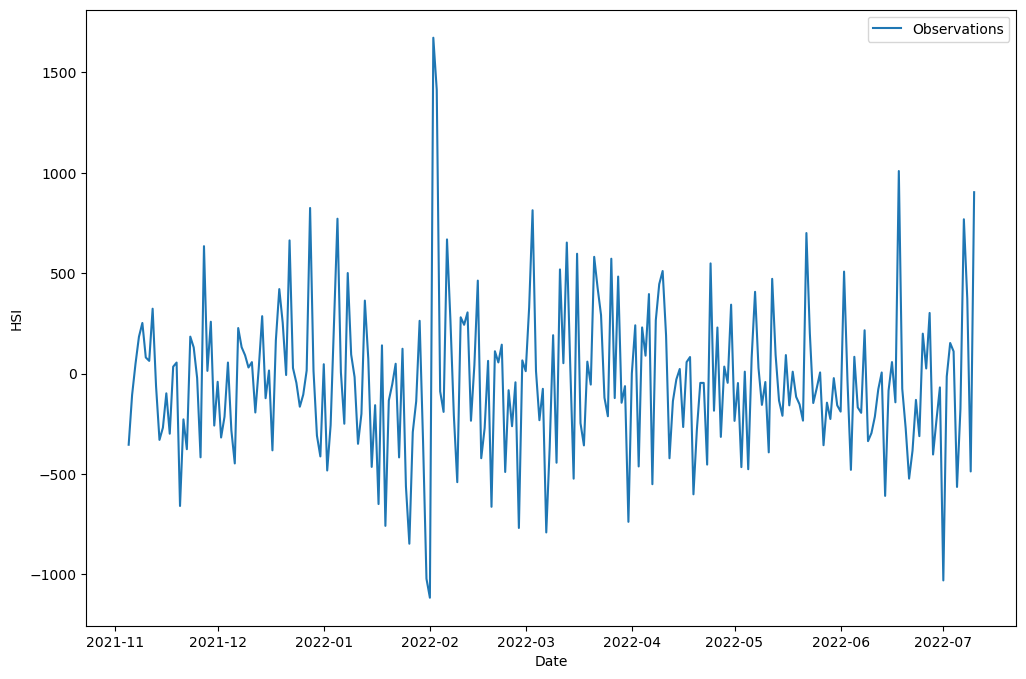

In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset
import matplotlib.dates as mdates


df = pd.read_csv('/Users/xiaoquanliu/Desktop/Book_DataCode/第六章/HSI_1.csv', 
                parse_dates=['Date'], 
                index_col='Date',
                usecols=['Date','HSI'])

start = df.index[0].to_pydatetime() 
end = df.index[-1].to_pydatetime()
df.index = pd.date_range(start=start, periods=len(df), freq='D')


# 1. 模型训练
model = ARIMA(df['HSI'], order=(2,1,2), dates=df.index)  
model_fit = model.fit()

# 2. 生成预测
start = pd.to_datetime(df.index[-1])
end = start + pd.DateOffset(days=240)
start_index = start.strftime('%Y-%m-%d')  
end_index = end.strftime('%Y-%m-%d')
predictions = model_fit.predict(start=start_index, end=end_index)
predictions.to_csv('/Users/xiaoquanliu/Desktop/Book_DataCode/第六章/hsi_predictions.csv')

# 3. 绘制预测图
plt.figure(figsize=(12,8))
plt.plot(df.index, df['HSI'], label='Observations')
plt.legend()
plt.xlabel('Date')
plt.ylabel('HSI')




In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.irf import IRAnalysis
import pandas as pd

columns = ['US_rate', 'Korea']
# 从本地 CSV 文件导入数据
df = pd.read_csv('/Users/xiaoquanliu/Desktop/Book_DataCode/第六章/VAR数据.csv', usecols=columns)  
df.head()

,US_rate,Korea
0,0.07,1706.19
1,0.07,1666.52
2,0.08,1769.65
3,0.07,1710.32
4,0.08,1652.71


In [6]:
df = df.astype(float)  # 将DataFrame中的所有数据类型转换为float类型
# 创建 VAR 模型
model = VAR(df)
# 拟合 VAR 模型
results = model.fit(maxlags=3, ic='aic')  # 指定滞后阶数和信息准则
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 15, Sep, 2024
Time:                     22:04:53
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    9.96101
Nobs:                     4295.00    HQIC:                   9.94759
Log likelihood:          -33521.4    FPE:                    20749.1
AIC:                      9.94026    Det(Omega_mle):         20681.6
--------------------------------------------------------------------
Results for equation US_rate
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.627794         0.063020           -9.962           0.000
L1.US_rate         0.460322         0.015673           29.371           0.000
L1.Korea           0.000141         0.000033            4.320         

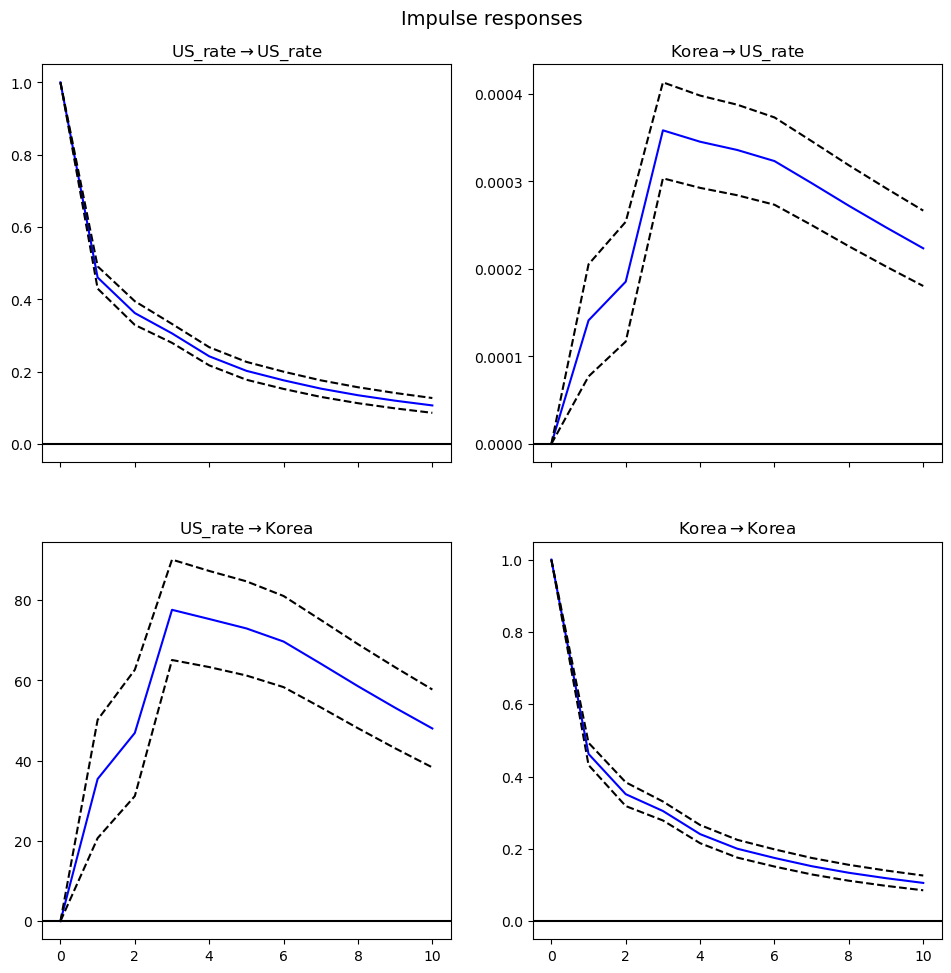

In [7]:
# 绘制脉冲冲击图
irf = results.irf(10)  # 设置要展示的阶数
irf.plot(orth=False)  # 将正交化设为 False，表示非正交脉冲响应
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.irf import IRAnalysis
import pandas as pd

columns = ['US_rate', 'HSI']
# 从本地 CSV 文件导入数据
df = pd.read_csv('/Users/xiaoquanliu/Desktop/Book_DataCode/第六章/VAR数据.csv', usecols=columns)  
df.head()

,US_rate,HSI
0,0.07,16250.26953
1,0.07,16250.26953
2,0.08,16822.15039
3,0.07,17172.27930
4,0.08,17407.80078


In [9]:
df = df.astype(float)  # 将DataFrame中的所有数据类型转换为float类型
# 创建 VAR 模型
model = VAR(df)
# 拟合 VAR 模型
results = model.fit(maxlags=3, ic='aic')  # 指定滞后阶数和信息准则
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 15, Sep, 2024
Time:                     22:05:02
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.45613
Nobs:                     4295.00    HQIC:                   3.44271
Log likelihood:          -19552.2    FPE:                    31.0434
AIC:                      3.43539    Det(Omega_mle):         30.9425
--------------------------------------------------------------------
Results for equation US_rate
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -1.287906         0.078137          -16.483           0.000
L1.US_rate         0.395069         0.015272           25.869           0.000
L1.HSI             0.001479         0.000616            2.399         

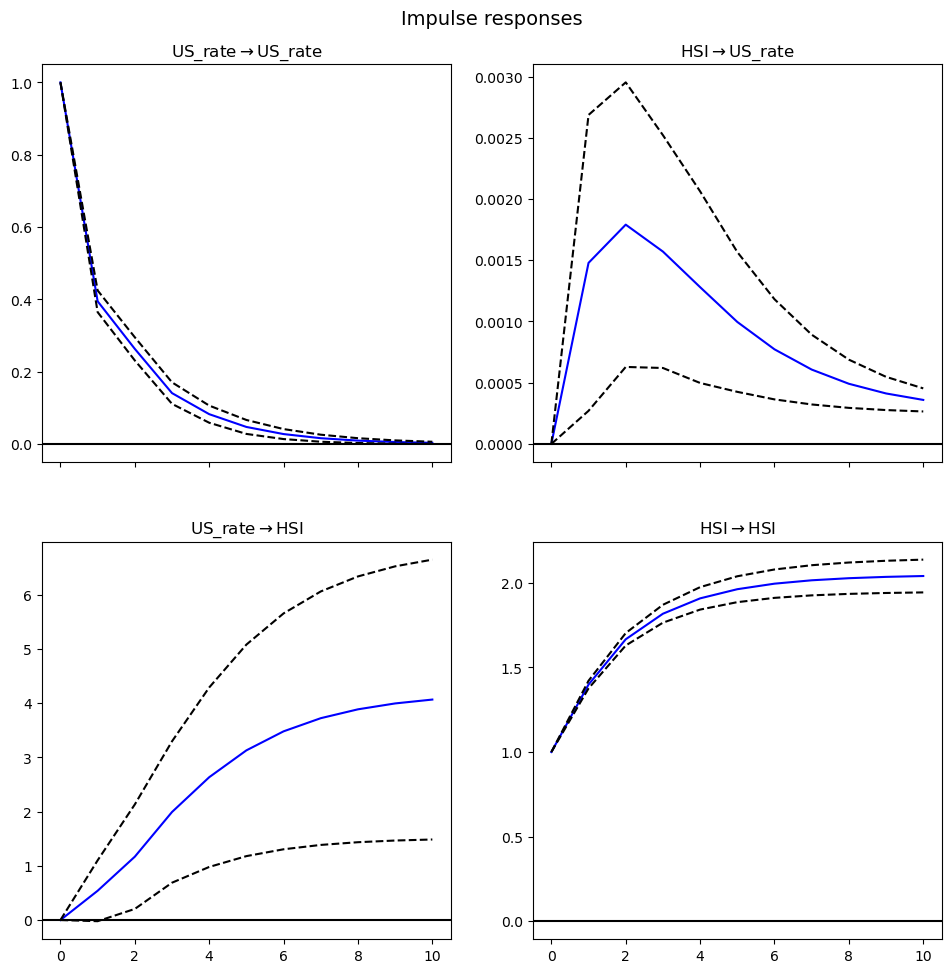

In [10]:
# 绘制脉冲冲击图
irf = results.irf(10) 
irf.plot(orth=False)  
plt.show()

In [10]:
pip install arch


Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import arch

columns = ['HSI']
# 从本地 CSV 文件导入数据
df = pd.read_csv('/Users/xiaoquanliu/Desktop/Book_DataCode/第六章/HSI_2.csv', usecols=columns)  
df['HSI'] = pd.to_numeric(df['HSI'], errors='coerce')
df.head()


,HSI
0,-150.09961
1,86.09961
2,-220.34961
3,272.66016
4,138.55859


In [12]:
clean_data=df.dropna()

# Construct ARCH(1) model
model = arch.arch_model(clean_data, vol='Garch', p=1)

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 80092.48247033788
Iteration:      2,   Func. Count:     14,   Neg. LLF: 19127.61965073662
Iteration:      3,   Func. Count:     21,   Neg. LLF: 19055.741466167172
Iteration:      4,   Func. Count:     28,   Neg. LLF: 19010.284894245764
Iteration:      5,   Func. Count:     33,   Neg. LLF: 19009.79013117305
Iteration:      6,   Func. Count:     38,   Neg. LLF: 19009.3424108651
Iteration:      7,   Func. Count:     43,   Neg. LLF: 19009.325824793013
Iteration:      8,   Func. Count:     48,   Neg. LLF: 19009.32405337716
Iteration:      9,   Func. Count:     53,   Neg. LLF: 19009.324022364115
Iteration:     10,   Func. Count:     58,   Neg. LLF: 19009.323939456423
Iteration:     11,   Func. Count:     63,   Neg. LLF: 19009.32380512119
Iteration:     12,   Func. Count:     68,   Neg. LLF: 19009.323036119218
Iteration:     13,   Func. Count:     73,   Neg. LLF: 19009.318619088346
Iteration:     14,   Func. Count:     78,   Neg. LLF: 1900

/Users/xiaoquanliu/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.562e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/xiaoquanliu/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
/Users/xiaoquanliu/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions 